<a href="https://colab.research.google.com/github/Mustasheep/Clientes-Inadimplentes/blob/main/defaulting_client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contas devedoras

- O objetivo é desenvolver um modelo que preveja se uma conta ficará inadimplente no próximo mês, de acordo com dados demográficos e históricos.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel("/content/drive/MyDrive/CSVs/default_of_credit_card_clients.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

## Perguntas a serem respondidas com o dataset:
1. Saber quantas colunas os dados contém (características, respostas ou metadadas);
2. Quantas linhas (amostras);
3. Que tipos de características existem. Quais são categóricas e quais são numéricas;
4. Qual é a aparência dos dados segundo essas características;
5. Se existem dados faltando.

_Vale ressaltar que as perguntas 1 e 2 já foram respondidas._

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Limpeza dos dados

In [6]:
# Identificando amostras exclusivas da variável "ID"
df["ID"].nunique()

29687

In [7]:
id_counts = df['ID'].value_counts()
id_counts.head()

,count
ID,
ad23fe5c-7b09,2
1fb3e3e6-a68d,2
89f8f447-fca8,2
7c9b7473-cc2f,2
90330d02-82d9,2


In [8]:
id_counts.value_counts()

,count
count,
1,29374
2,313


**Podemos notar que possuem 313 valores duplicados**

_Esses valores duplicados ocorrem duas vezes, ou seja, de acordo com o 'id_counts.head()' nenhum ID ocorre mais do que duas vezes._

## Aplicando máscara lógica no Dataset

In [9]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

,count
ID,
ad23fe5c-7b09,True
1fb3e3e6-a68d,True
89f8f447-fca8,True
7c9b7473-cc2f,True
90330d02-82d9,True


In [10]:
# Armazenando os IDs duplicados em uma variável
dupe_ids = id_counts.index[dupe_mask]

In [11]:
dupe_ids = list(dupe_ids)
len(dupe_ids)
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [12]:
# Examinar os dados duplicados dentro do Dataframe
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) # isin com as 3 primeiras amostras combinadas [0:3] e atribuindo todas as variáveis :

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


_Nessa consulta fica claro que os valores duplicados (da saída em questão) possuem valores igual a 0. Esses valores não são úteis e devem ser removidos_

In [13]:
# Criando variável para armazenar linhas contendo 0
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

Foi criada uma série booleana,
feature_zero_mask, que identifique cada linha em que todos os
elementos a partir da segunda coluna (as características e a resposta,
mas não os IDs) sejam 0.

* Nesse método, passaremos `(:)` para examinar todas as linhas e `(1:)` para
examinar todas as colunas a partir da segunda `index [1]`.

* O método `all()` ao longo do eixo da coluna `(axis=1)` e ele
retornará True somente se todas as colunas dessa linha forem iguais a
True.

_output: 315 -> núumero de linhas somente com zeros exceto pelo ID_

In [14]:
# Limpreza do Dataframe
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1.shape

(29685, 25)

In [15]:
df_clean_1['ID'].nunique()

29685

In [16]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


Por que a variável PAY_1 está como `object` ?

In [17]:
df_clean_1["PAY_1"].head(5)

,PAY_1
0,2
1,-1
2,0
3,0
4,-1


In [18]:
df_clean_1["PAY_1"].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


In [19]:
# Criando uma máscara para encontrar linhas sem dados ausentes
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

,PAY_1
0,True
1,True
2,True
3,True
4,True


In [20]:
sum(valid_pay_1_mask)

26664

In [21]:
# Limpar os dados eliminando as linhas ausentes de Pay_1
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [22]:
# Converter o tipo de dado da variavel PAY_1
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[["PAY_1", "PAY_2"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


# Exploração e garantia de qualidade dos dados

* O gênero não deve ser usado na previsão de solvibilidade, já que por seus
padrões seria antiético.

* Os histogramas
são uma boa maneira de visualizar dados que estejam em uma escala
contínua, como valores monetários e faixas etárias.

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] #figuras em alta resolução

100.0

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

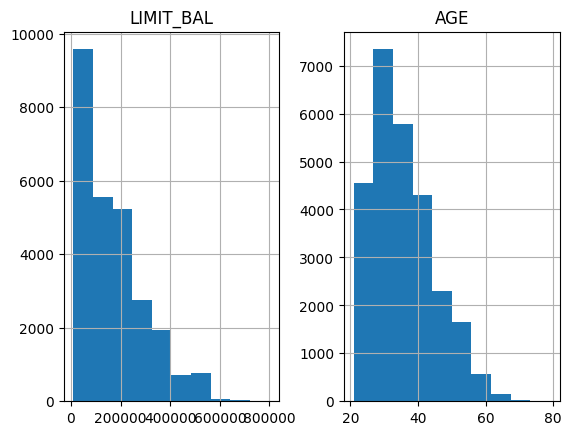

In [24]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

* LIMIT_BAL: Valor do crédito fornecido (em novos dólares taiwaneses (NT)) inclusive o crédito do consumidor individual e familiar (complementar).

In [25]:
# Relatório tabular de síntese estatística
df_clean_2[["LIMIT_BAL", "AGE"]].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Os limites de
crédito têm um valor mínimo igual a `10.000`. Esse dataset é de Taiwan; a
unidade monetária (novos dólares taiwanses) não é familiar, mas
intuitivamente sabemos que o limite de crédito deve ser um valor acima
de zero.

* _1 TWD = 0,185 BRL_

A característica `AGE` também parece bem distribuída, com ninguém com
idade abaixo de 21 anos possuindo uma conta de crédito.

In [26]:
df_clean_2["EDUCATION"].value_counts()

,count
EDUCATION,
2,12458
1,9412
3,4380
5,245
4,115
6,43
0,11


* EDUCATION: Instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).

In [27]:
# Agrupamento das instruções acima de 4 e 0, atribuindo como 'outros'
df_clean_2.replace({'EDUCATION': {0: 4, 5: 4, 6: 4}}, inplace=True)
df_clean_2["EDUCATION"].value_counts()

,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


In [28]:
# Contagem de valores da característica MARRIAGE
df_clean_2["MARRIAGE"].value_counts()

,count
MARRIAGE,
2,14158
1,12172
3,286
0,48


* MARRIAGE: Estado civil (1 = casado; 2 = solteiro; 3 = outros).

In [29]:
# Mesmo agrupamento será aplicado
df_clean_2.replace({'MARRIAGE': {0: 3}}, inplace=True)
df_clean_2["MARRIAGE"].value_counts()

,count
MARRIAGE,
2,14158
1,12172
3,334


## Aprofundamento nas características categóricas

Os algoritmos de machine learning só funcionam com números. Caso os dados contiverem características textuais, seria necessário transformá-los em números. Por esta razão as variáveis categóricas como `EDUCATION` ou `MARRIAGE` estão rotuladas (a primeira sendo uma característica ordinal).

**Implicações:**

* Os graus de instrução ordinal, com 1 correspondendo ao mais alto grau de nosso dataset, 2 ao grau superior seguinte, 3 ao próximo e 4 presumivelmente incluindo os graus mais baixos.

* No entanto, quando usarmos essa codificação como característica numérica em um modelo de machine learning, ela será tratada como qualquer outra característica numérica. Para alguns modelos, esse efeito pode não ser o desejado.